# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../../')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [3]:
df = pd.read_csv('../../../input/df_c19_raw.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

CPI Core  CPI Tradable  CPI Non-Tradable       CPI  CPI Non-Core  \
Fecha                                                                          
2003-10-01  0.091267      0.460730          0.514069  0.492247      1.078211   
2003-11-01  0.092842      0.449419          0.476486  0.465462      1.009369   
2003-12-01  0.094296      0.437075          0.439183  0.438413      0.940109   
2004-01-01  0.095620      0.423839          0.402122  0.411138      0.870541   
2004-02-01  0.096795      0.409852          0.365307  0.383700      0.800843   

            CPI Food and Energy  CPI Excluding Food and Energy  \
Fecha                                                            
2003-10-01             0.916599                      -0.008282   
2003-11-01             0.858081                       0.002340   
2003-12-01             0.799280                       0.012736   
2004-01-01             0.740242                       0.022936   
2004-02-01             0.681065                       0.032967   

            CPI Food and Beverages  CPI Excluding Food and Beverages  \
Fecha                                                                  
2003-10-01                0.987035                          0.050294   
2003-11-01                0.909263                          0.069318   
2003-12-01                0.831909                          0.087472   
2004-01-01                0.754927                          0.104864   
2004-02-01                0.678293                          0.121634   

            CPI Core Excluding Food and Beverages  CPI Imported  \
Fecha                                                             
2003-10-01                               0.031116      1.056286   
2003-11-01                               0.032549      1.014146   
2003-12-01                               0.033944      0.970034   
2004-01-01                               0.035360      0.924542   
2004-02-01                               0.036840      0.878410   

            Wholesale Price Index  Reserve Requirement Rate  \
Fecha                                                         
2003-10-01               0.646277                 10.349944   
2003-11-01               0.615219                 11.690608   
2003-12-01               0.582957                 11.391178   
2004-01-01               0.549642                 10.634030   
2004-02-01               0.515502                 10.718295   

            Monetary Policy Rate  \
Fecha                              
2003-10-01                  2.75   
2003-11-01                  2.50   
2003-12-01                  2.50   
2004-01-01                  2.50   
2004-02-01                  2.50   

            Circulating Currency Seasonally Adjusted (mill S/)  \
Fecha                                                            
2003-10-01                                           0.010225    
2003-11-01                                           0.011445    
2003-12-01                                           0.016607    
2004-01-01                                           0.019490    
2004-02-01                                           0.017003    

            Net International Reserves (mill $)  Real Minimum Wage (Index)  
Fecha                                                                       
2003-10-01                             0.005542                   0.056953  
2003-11-01                             0.050288                  -0.001674  
2003-12-01                            -0.010532                  -0.005608  
2004-01-01                             0.036233                  -0.005346  
2004-02-01                            -0.005743                  -0.010744

In [4]:
df_lags = pd.read_csv('../../../input/df_C19_lags.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

CPI Core  CPI Tradable_lag_1  CPI Tradable_lag_2  \
Fecha                                                          
2003-12-01  0.094296            0.449419            0.460730   
2004-01-01  0.095620            0.437075            0.449419   
2004-02-01  0.096795            0.423839            0.437075   
2004-03-01  0.097830            0.409852            0.423839   
2004-04-01  0.098709            0.395219            0.409852   

            CPI Non-Tradable_lag_1  CPI Non-Tradable_lag_2  CPI_lag_1  \
Fecha                                                                   
2003-12-01                0.476486                0.514069   0.465462   
2004-01-01                0.439183                0.476486   0.438413   
2004-02-01                0.402122                0.439183   0.411138   
2004-03-01                0.365307                0.402122   0.383700   
2004-04-01                0.328789                0.365307   0.356172   

            CPI_lag_2  CPI Non-Core_lag_1  CPI Non-Core_lag_2  \
Fecha                                                           
2003-12-01   0.492247            1.009369            1.078211   
2004-01-01   0.465462            0.940109            1.009369   
2004-02-01   0.438413            0.870541            0.940109   
2004-03-01   0.411138            0.800843            0.870541   
2004-04-01   0.383700            0.731181            0.800843   

            CPI Food and Energy_lag_1  ...  Reserve Requirement Rate_lag_1  \
Fecha                                  ...                                   
2003-12-01                   0.858081  ...                       11.690608   
2004-01-01                   0.799280  ...                       11.391178   
2004-02-01                   0.740242  ...                       10.634030   
2004-03-01                   0.681065  ...                       10.718295   
2004-04-01                   0.621851  ...                       10.207277   

            Reserve Requirement Rate_lag_2  Monetary Policy Rate_lag_1  \
Fecha                                                                    
2003-12-01                       10.349944                         2.5   
2004-01-01                       11.690608                         2.5   
2004-02-01                       11.391178                         2.5   
2004-03-01                       10.634030                         2.5   
2004-04-01                       10.718295                         2.5   

            Monetary Policy Rate_lag_2  \
Fecha                                    
2003-12-01                        2.75   
2004-01-01                        2.50   
2004-02-01                        2.50   
2004-03-01                        2.50   
2004-04-01                        2.50   

            Circulating Currency Seasonally Adjusted (mill S/)_lag_1  \
Fecha                                                                  
2003-12-01                                           0.011445          
2004-01-01                                           0.016607          
2004-02-01                                           0.019490          
2004-03-01                                           0.017003          
2004-04-01                                           0.022076          

            Circulating Currency Seasonally Adjusted (mill S/)_lag_2  \
Fecha                                                                  
2003-12-01                                           0.010225          
2004-01-01                                           0.011445          
2004-02-01                                           0.016607          
2004-03-01                                           0.019490          
2004-04-01                                           0.017003          

            Net International Reserves (mill $)_lag_1  \
Fecha                                                   
2003-12-01                                   0.050288   
2004-01-01                                  -0.010532

## 2.3 Visualizing our data

We do a quick inspect in our data by plotting our input variables

In [5]:
# We select our input variables: all except CPI
df_variables = df.iloc[:, 1:]

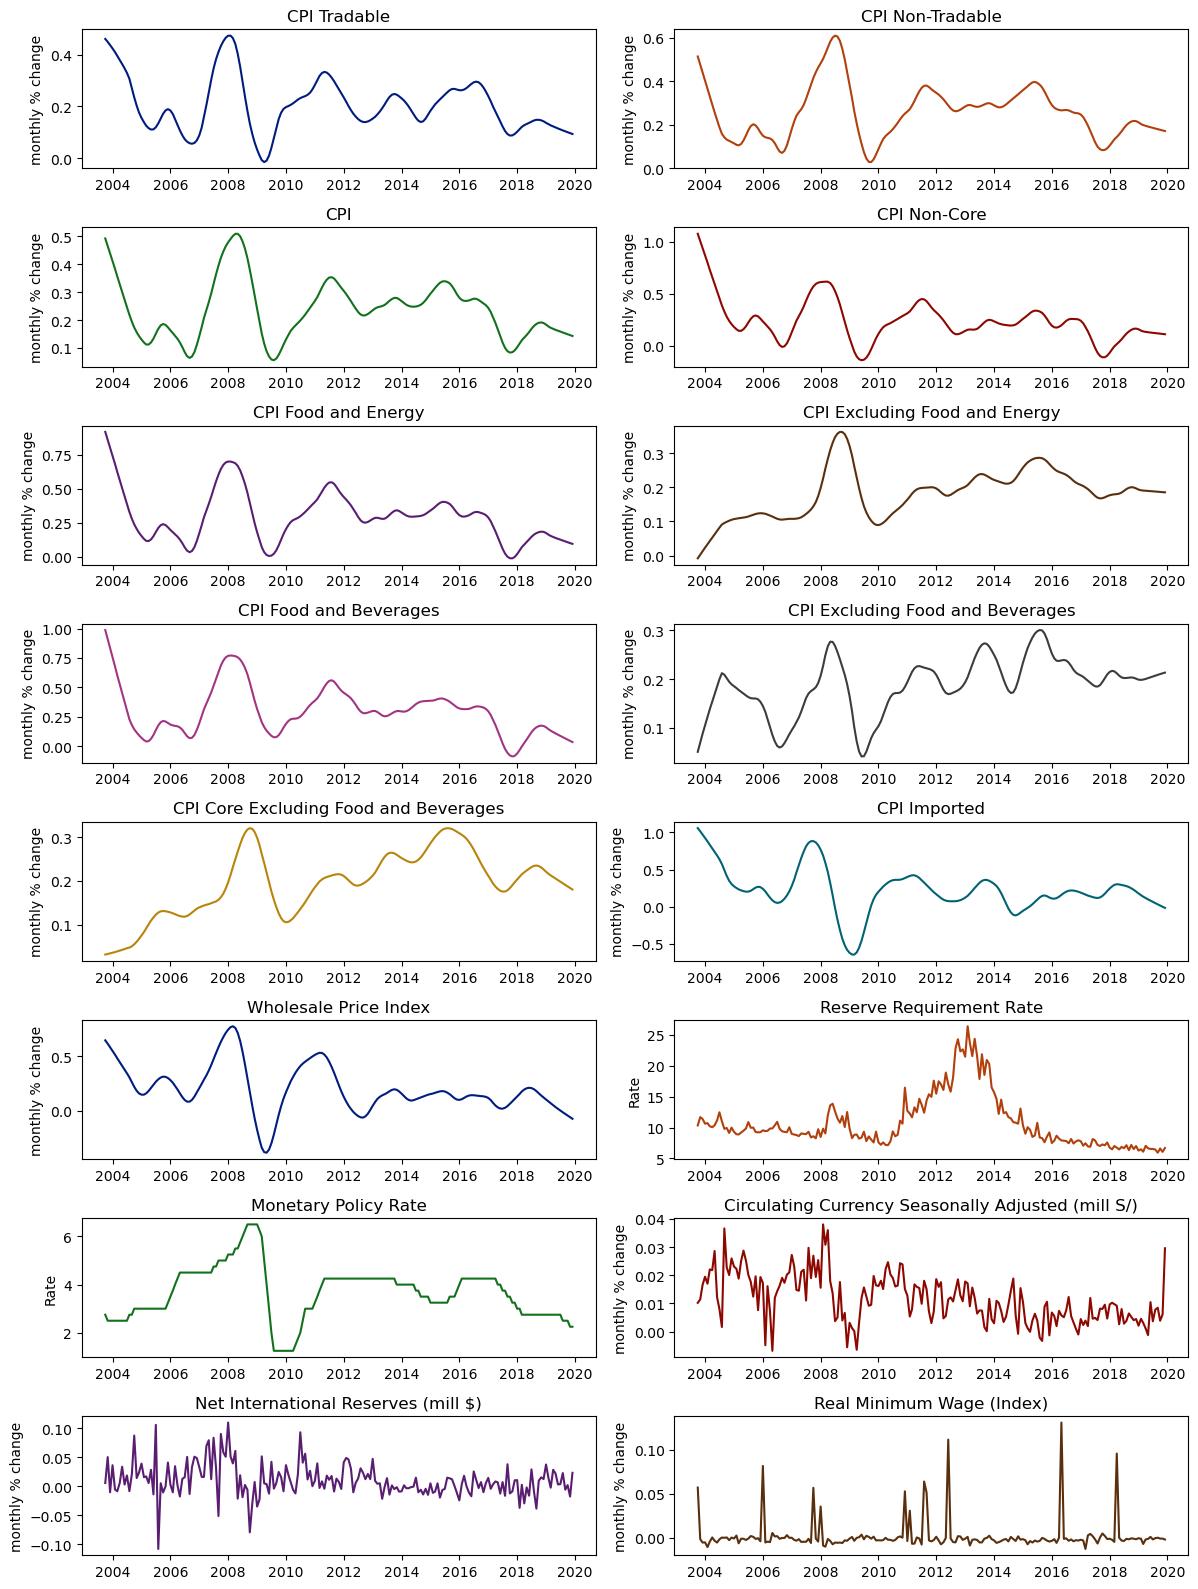

In [6]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))


columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columna for each plot
for i in range(8):
    for j in range(2):
        index = i * 2 + j
        ax = axes[i, j]
        ax.plot(df.index, df[columns[index]], color=colors[index])
        ax.set_title(columns[index])
        if "Reserve Requirement Rate" in columns[index] or "Monetary Policy Rate" in columns[index]:
            ax.set_ylabel('Rate')
        else:
            ax.set_ylabel('monthly % change')
        

plt.tight_layout()

plt.savefig('../../../output/data_visualization/plot_variables_C19.png')
plt.show()

## 2.4 Getting correlations

First, we obtain the correlations between the Consumer Price Index Core (IPC Core) and all the variables

In [7]:
corr = df.corr()['CPI Core']
pd.DataFrame(corr)

CPI Core
CPI Core                                            1.000000
CPI Tradable                                        0.254639
CPI Non-Tradable                                    0.753783
CPI                                                 0.635439
CPI Non-Core                                        0.148988
CPI Food and Energy                                 0.401472
CPI Excluding Food and Energy                       0.880487
CPI Food and Beverages                              0.512013
CPI Excluding Food and Beverages                    0.612782
CPI Core Excluding Food and Beverages               0.854089
CPI Imported                                       -0.278791
Wholesale Price Index                               0.068423
Reserve Requirement Rate                            0.317110
Monetary Policy Rate                                0.659337
Circulating Currency Seasonally Adjusted (mill S/) -0.251305
Net International Reserves (mill $)                -0.111839
Real Minimum Wage (Index)                          -0.006058

## 2.5 Visualizing correlations

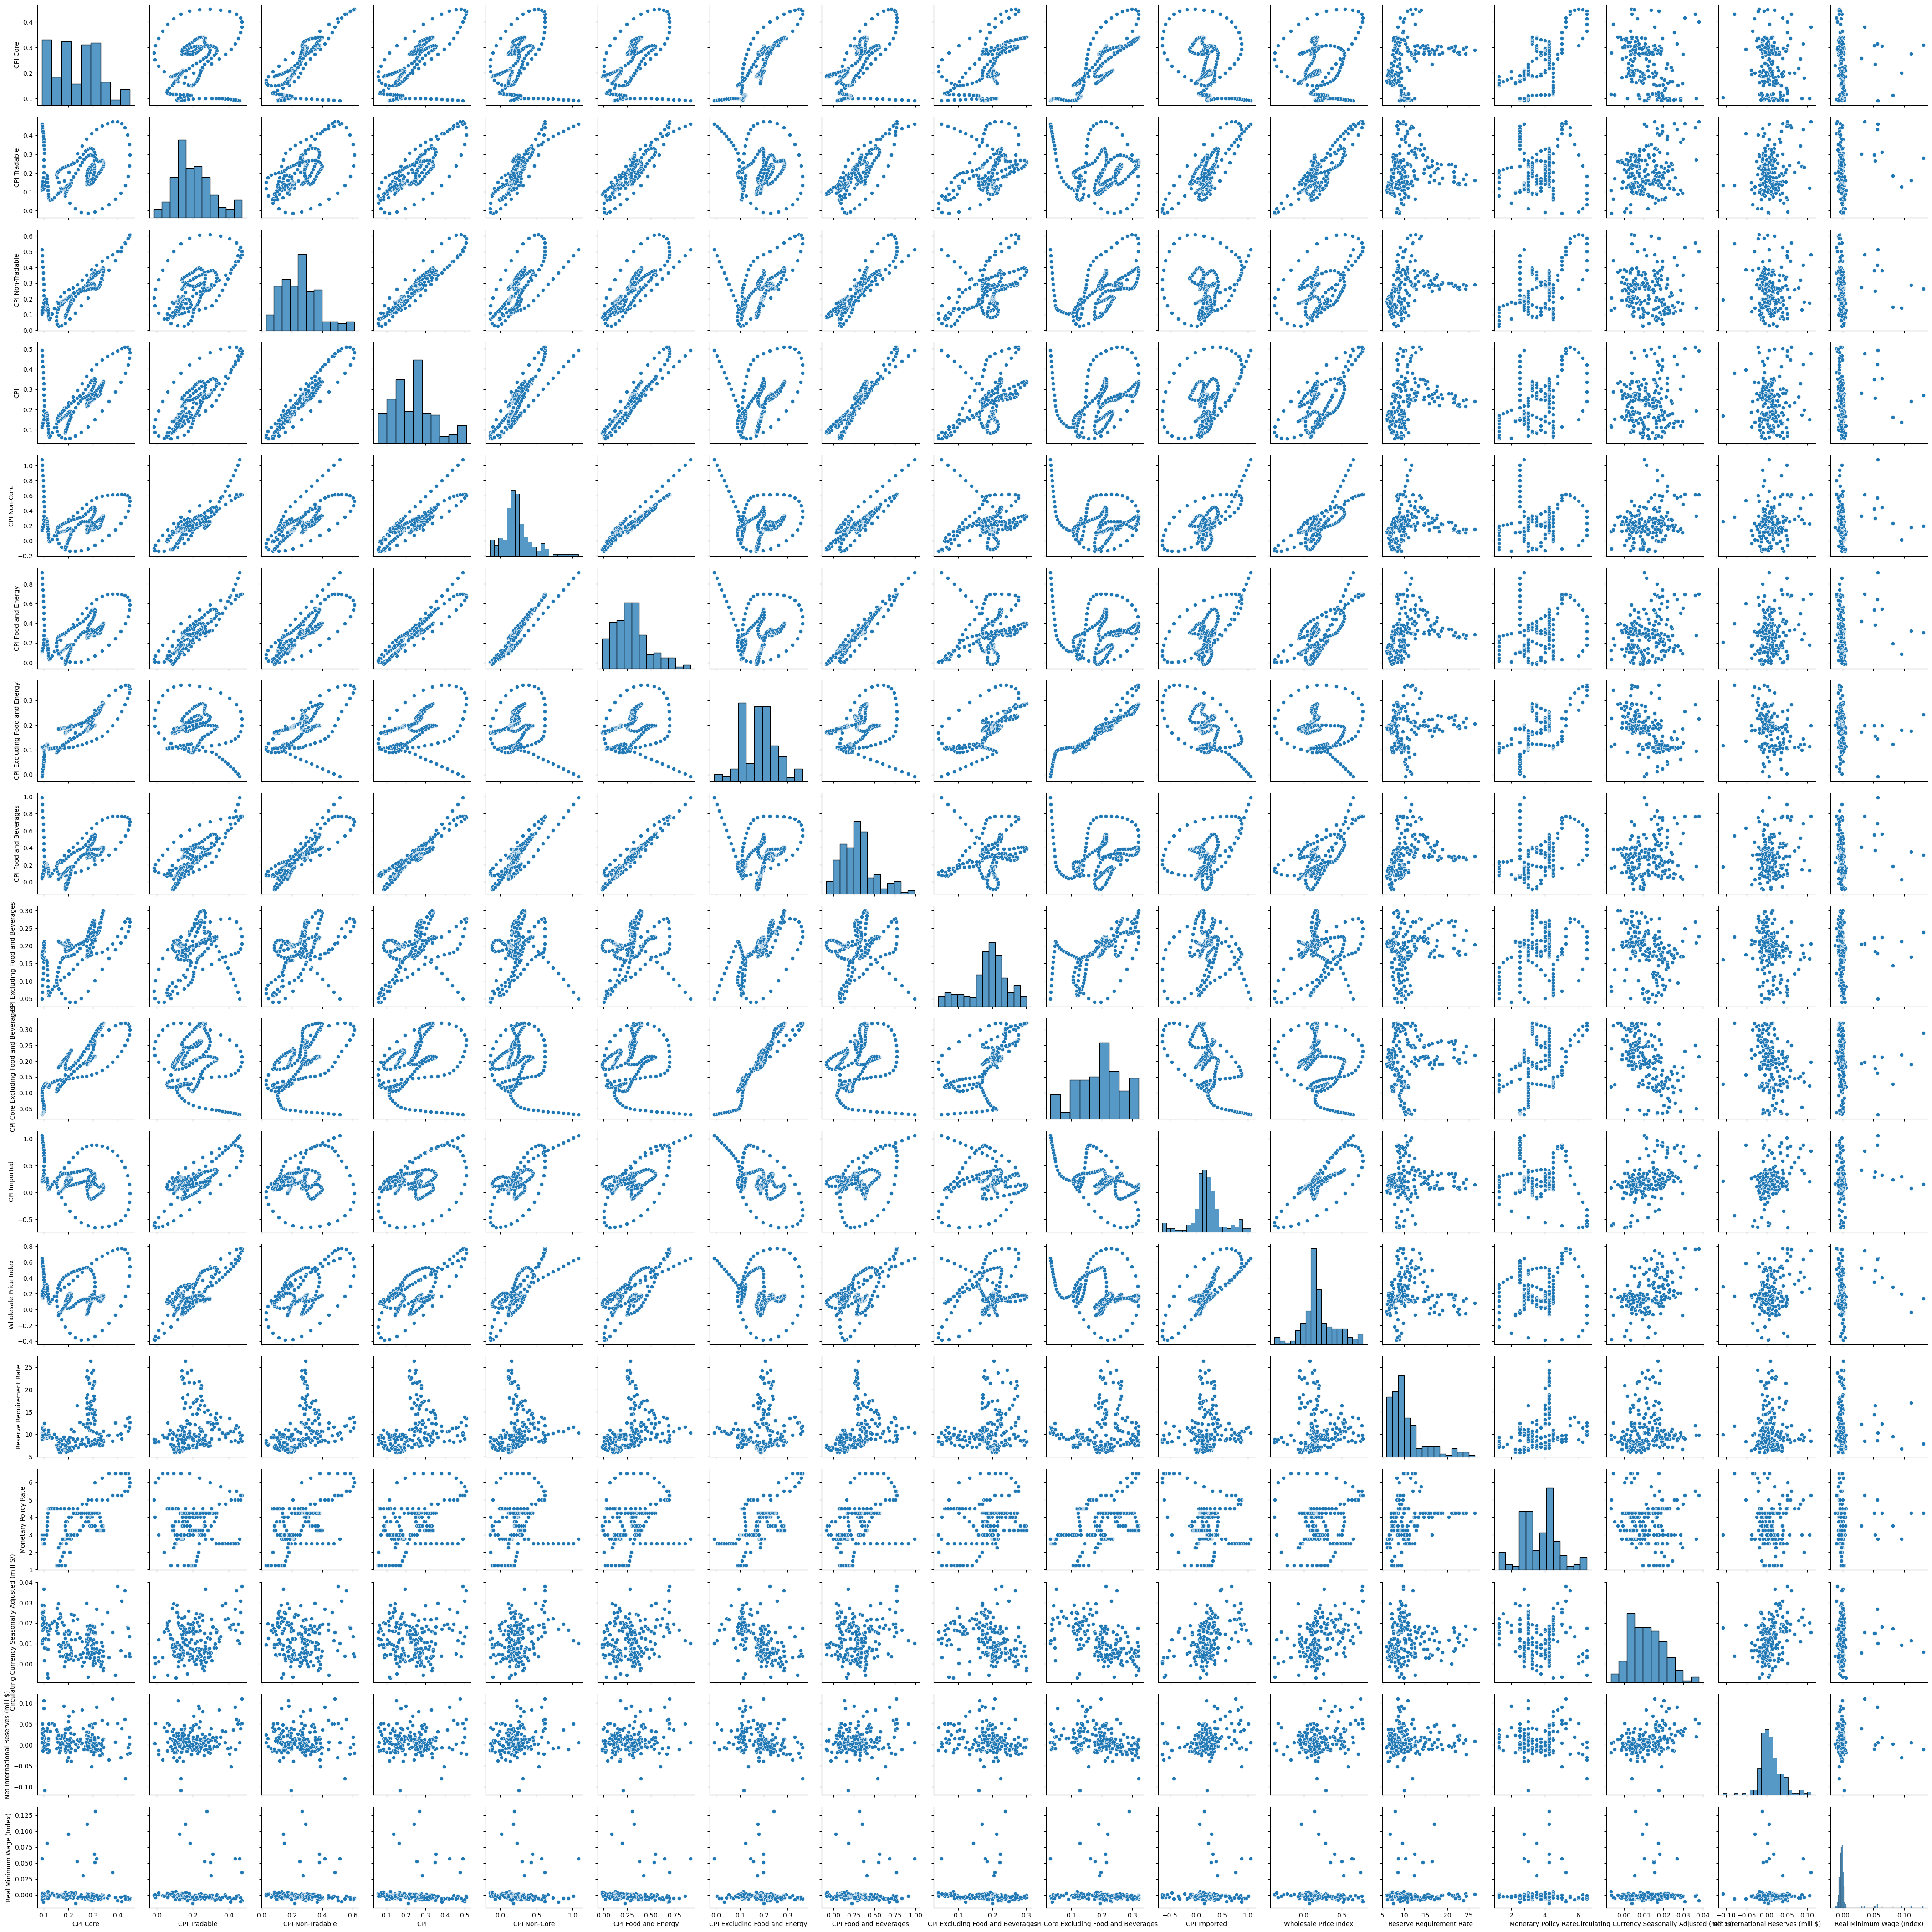

In [11]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/pairplot_c19.png')

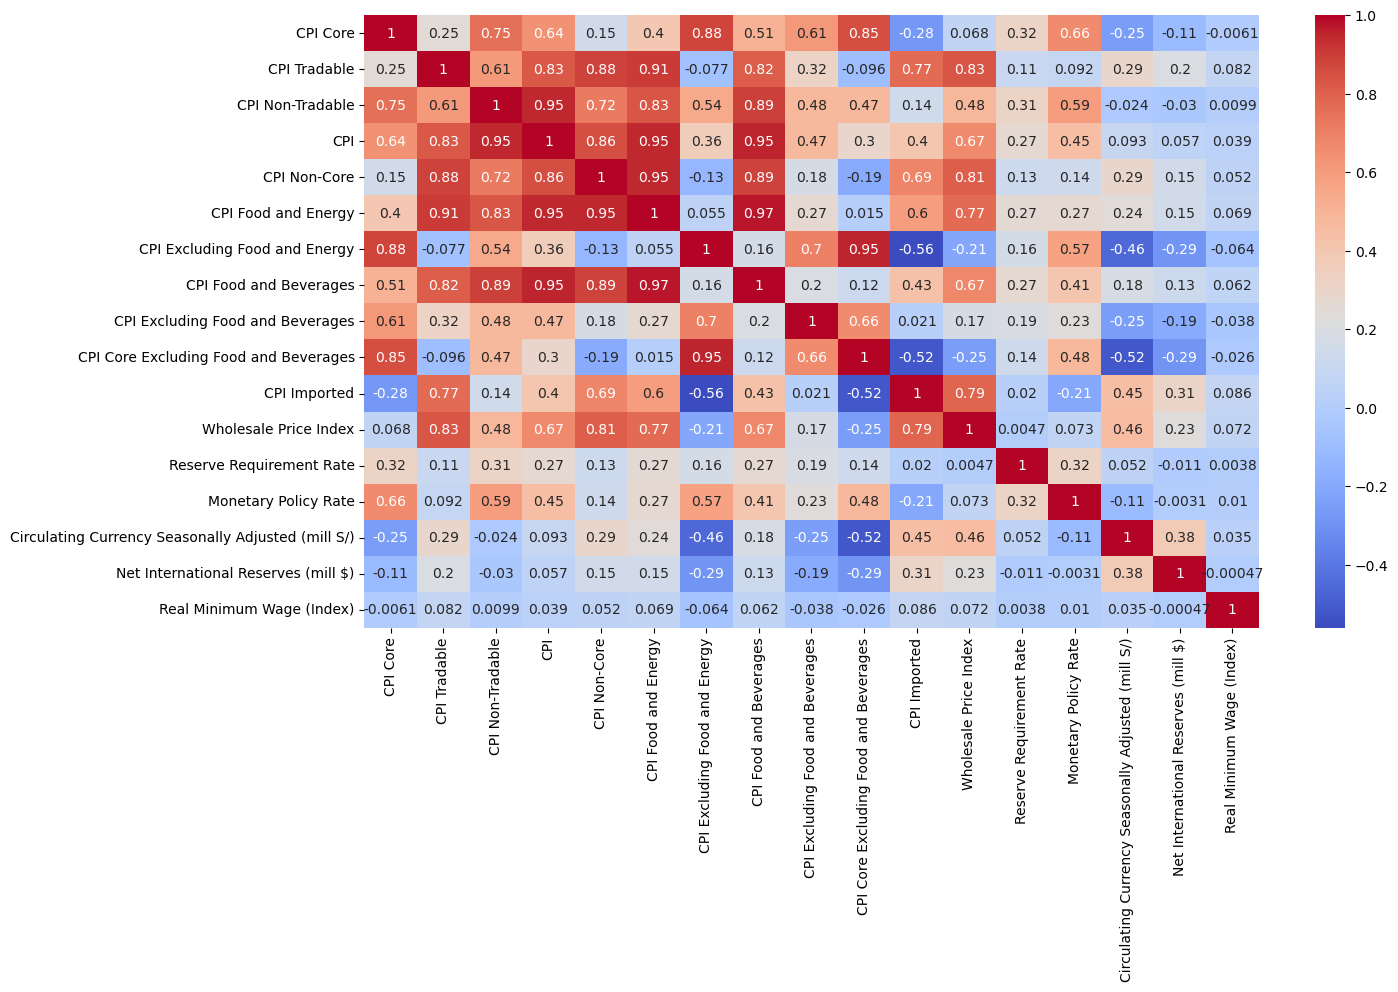

In [9]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/heatmap_c19.png')

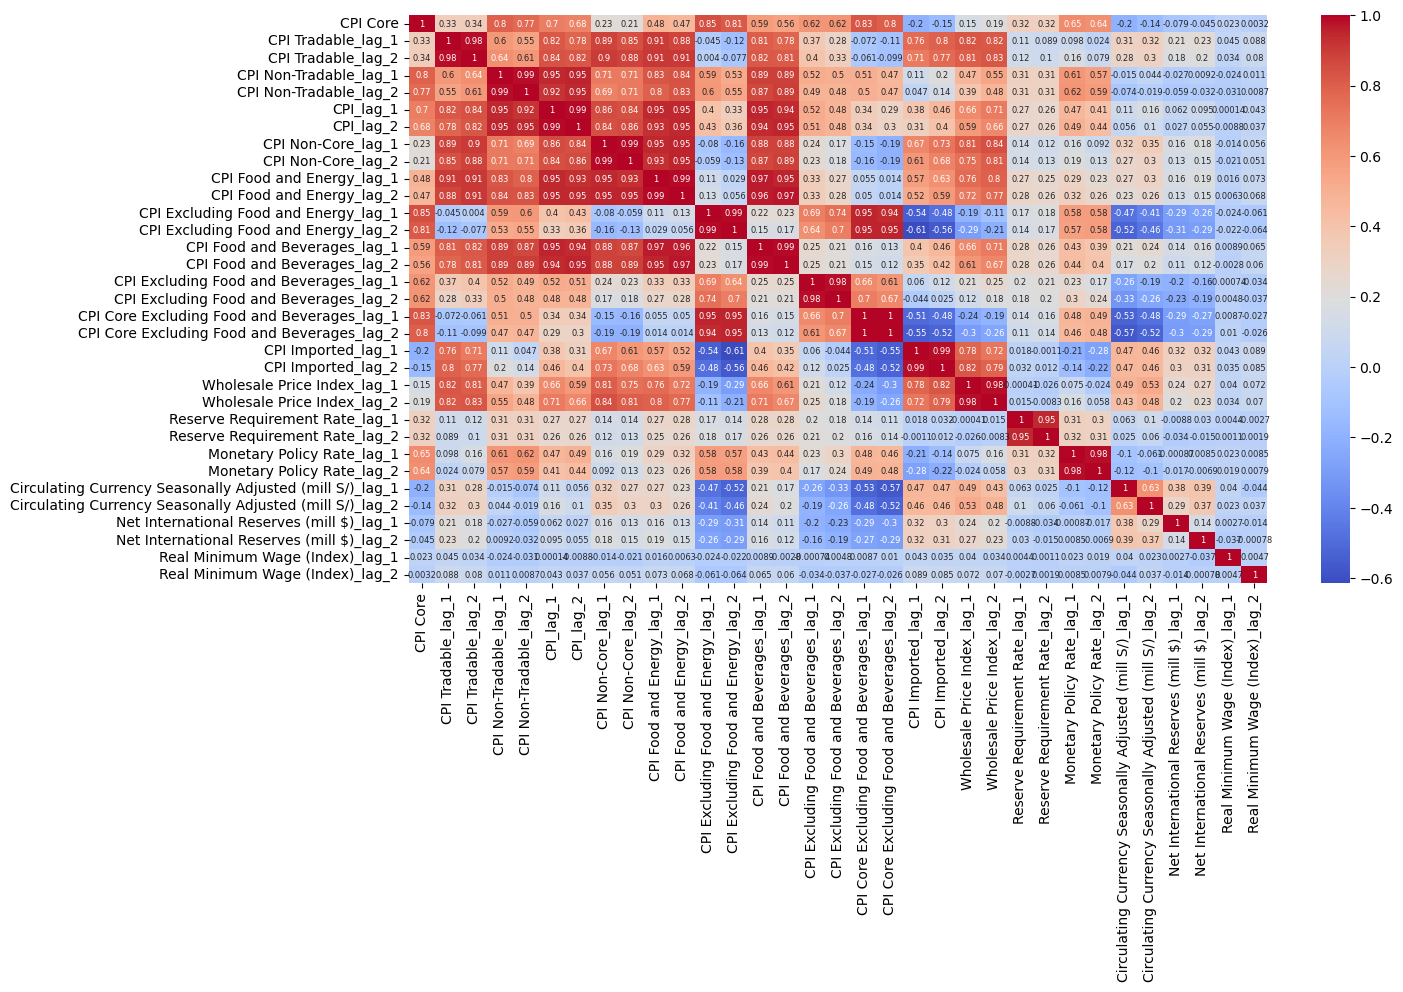

In [10]:
corr = df_lags.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/heatmap_lags_c19.png')